In [113]:
# Import necessary modules for this notebook
import qiskit
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from qiskit.qasm2 import dumps
print(qiskit.__version__)

2.1.0


Let us create 9-qubit circuit with toffoli sequence

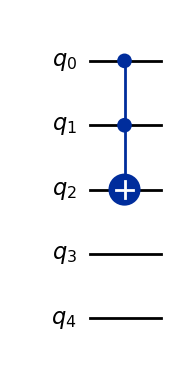

In [110]:
qc = QuantumCircuit(5)
qc.ccx(0,1, 2)
qc.draw(output='mpl')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
ccx q[0],q[1],q[2];
OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
cx q[0],q[1];


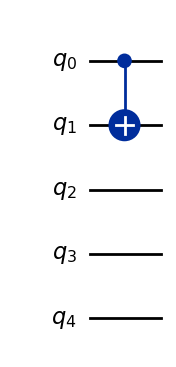

In [111]:
string = dumps(qc)
print(string)

new_string = string.replace('ccx q[0],q[1],q[2]', 'cx q[0],q[1]')
print(new_string)

new_qc = QuantumCircuit.from_qasm_str(new_string)
new_qc.draw(output='mpl')

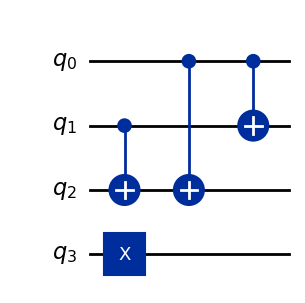

In [112]:
qc_4 = QuantumCircuit(4)

qc_4.cx(1, 2)
qc_4.cx(0, 2)
qc_4.x(3)
qc_4.cx(0, 1)

qc_4.draw("mpl")


In [ ]:
import importlib
import templates_other_version as f
importlib.reload(f)

[[['cx', 2, 3], ['cx', 3, 4], ['cx', 2, 3]]]


<module 'functions' from '/Users/giovanniconcheri/Desktop/WoQHackathon/functions.py'>

In [80]:
string = dumps(qc_4)
print(string)

# list_of_ops = f.string_to_list(string)
list_of_ops = f.extract_elements(string)


print(list_of_ops)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
cx q[1],q[2];
cx q[0],q[2];
x q[3];
cx q[0],q[1];
[['cx', 1, 2], ['cx', 0, 2], ['x', 3], ['cx', 0, 1]]


In [ ]:
triplets = f.find_cx_triplets(list_of_ops)
print(triplets)

AttributeError: module 'functions' has no attribute 'find_valid_cx_triplets'

In [39]:
# def compare_toffoli(circuit, toffolisequence):
#     """
#     Compare two quantum circuits and return True if they are equivalent, False otherwise.
#     """
#     string = dumps(circuit)
#     list_of_ops = f.string_to_list(string)

#     compare_list = toffolisequence

#     for idx,item in enumerate(list_of_ops[:-2]):
#         if item in compare_list:
            
#             if     

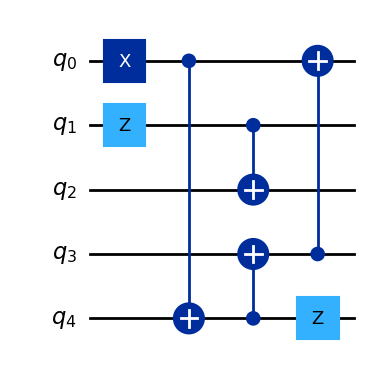

In [82]:
# we create an example of a circuit in which inside there is a template of the database

qc = QuantumCircuit(5)

qc.x(0)
qc.z(1)
qc.cx(0, 4)
qc.cx(1, 2)

qc.cx(4, 3)
# qc.x(3)
qc.z(4)
qc.cx(3, 0)


qc.draw("mpl")


In [83]:
string = dumps(qc)
print(string)

# list_of_ops = f.string_to_list(string)
list_of_ops = f.extract_elements(string)

print(list_of_ops)

import numpy as np

triplets = f.find_cx_triplets(list_of_ops,f.toffoli[0])
print(triplets)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
x q[0];
z q[1];
cx q[0],q[4];
cx q[1],q[2];
cx q[4],q[3];
z q[4];
cx q[3],q[0];
[['x', 0], ['z', 1], ['cx', 0, 4], ['cx', 1, 2], ['cx', 4, 3], ['z', 4], ['cx', 3, 0]]
[]


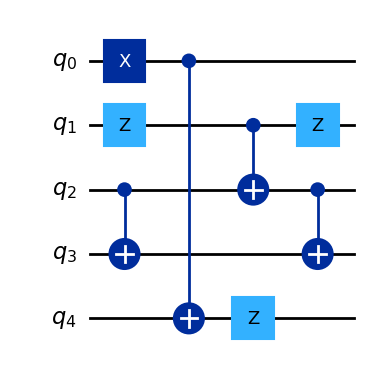

In [84]:
# we create an example of a circuit in which inside there is a template of the database

qc = QuantumCircuit(5)

qc.x(0)
qc.cx(0, 4)
qc.cx(2, 3)
qc.z(1)
qc.cx(1, 2)
qc.z(1)
qc.cx(2, 3)
qc.z(4)


qc.draw("mpl")


In [85]:
string = dumps(qc)
print(string)

# list_of_ops = f.string_to_list(string)
list_of_ops = f.extract_elements(string)

print(list_of_ops)

import numpy as np

triplets = f.find_cx_triplets(list_of_ops,f.toffoli[1])
print(triplets)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
x q[0];
cx q[0],q[4];
cx q[2],q[3];
z q[1];
cx q[1],q[2];
z q[1];
cx q[2],q[3];
z q[4];
[['x', 0], ['cx', 0, 4], ['cx', 2, 3], ['z', 1], ['cx', 1, 2], ['z', 1], ['cx', 2, 3], ['z', 4]]
[[['cx', 2, 3], ['cx', 1, 2], ['cx', 2, 3]]]


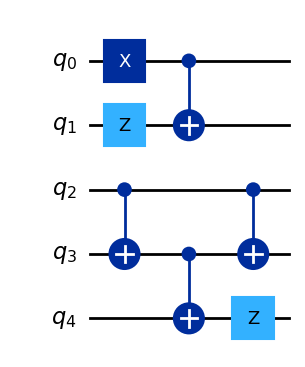

In [101]:
# we create an example of a circuit in which inside there is a template of the database

qc = QuantumCircuit(5)

qc.x(0)
qc.z(1)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cx(0, 1)
qc.z(4)
qc.cx(2, 3)

qc.draw("mpl")


In [97]:
string = dumps(qc)
print(string)

# list_of_ops = f.string_to_list(string)
list_of_ops = f.extract_elements(string)

print(list_of_ops)

import numpy as np

triplets = f.find_cx_triplets(list_of_ops,f.toffoli[2])
print(triplets)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
x q[0];
z q[1];
cx q[2],q[3];
cx q[3],q[4];
cx q[0],q[1];
z q[4];
cx q[2],q[3];
ccx q[2],q[3],q[4];
cx q[2],q[3];
ccx q[2],q[3],q[4];
[['x', 0], ['z', 1], ['cx', 2, 3], ['cx', 3, 4], ['cx', 0, 1], ['z', 4], ['cx', 2, 3], ['ccx', 2, 3, 4], ['cx', 2, 3], ['ccx', 2, 3, 4]]
[[['cx', 2, 3], ['cx', 3, 4], ['cx', 2, 3]]]


### Transpiler

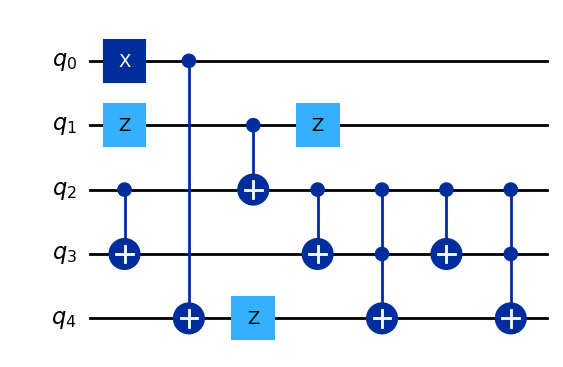

In [102]:
# we create an example of a circuit in which inside there is a template of the database


qc = QuantumCircuit(5)

qc.x(0)
qc.cx(0, 4)
qc.cx(2, 3)
qc.z(1)
qc.cx(1, 2)
qc.z(1)
qc.cx(2, 3)
qc.z(4)
qc.ccx(2,3,4)
qc.cx(2,3)
qc.ccx(2,3,4)


qc.draw("mpl")

Optimization level: 0
Transpilation time (sec.): 0.006356954574584961
Circuit depth: 229
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 1
Transpilation time (sec.): 0.005944013595581055
Circuit depth: 114
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 2
Transpilation time (sec.): 0.005739927291870117
Circuit depth: 96
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 3
Transpilation time (sec.): 0.00885915756225586
Circuit depth: 96
------------------------------------------------------------------------------------------------------------------------------------------------------


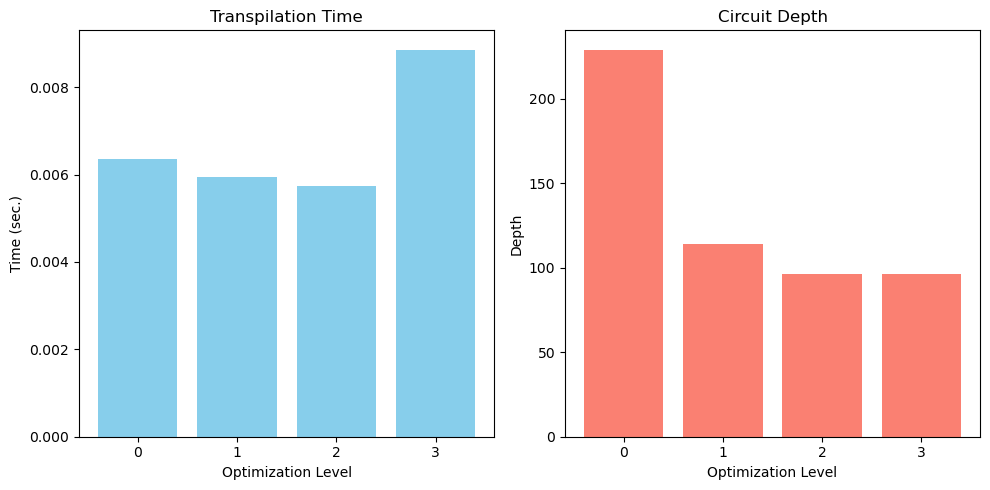

In [103]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
import matplotlib.pyplot as plt

backend = FakeSherbrooke()


times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over different optimization levels
optimization_levels = [0,1,2,3]
for level in optimization_levels:
    pm = generate_preset_pass_manager(backend = backend, optimization_level=level, layout_method= "dense")
    ### YOUR CODE FINISHES HERE ###
    print('\033[1m' + f'Optimization level: {level}')
    start = time.time()
    isa_qc = pm.run(qc)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar([str(lvl) for lvl in optimization_levels], times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Optimization Level')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar([str(lvl) for lvl in optimization_levels], depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Optimization Level')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


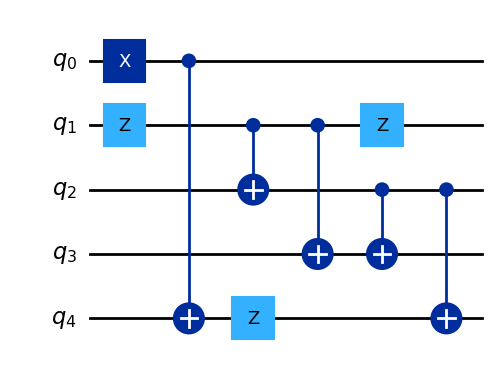

In [107]:
qc_s = QuantumCircuit(5)

qc_s.x(0)
qc_s.cx(0, 4)
qc_s.z(1)
qc_s.cx(1, 2)
qc_s.cx(1,3)
qc_s.z(1)
qc_s.z(4)
qc_s.cx(2,3)
qc_s.cx(2,4)


qc_s.draw("mpl")

Optimization level: 0
Transpilation time (sec.): 0.007781267166137695
Circuit depth: 73
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 1
Transpilation time (sec.): 0.0068340301513671875
Circuit depth: 53
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 2
Transpilation time (sec.): 0.0063517093658447266
Circuit depth: 54
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 3
Transpilation time (sec.): 0.009003877639770508
Circuit depth: 60
------------------------------------------------------------------------------------------------------------------------------------------------------


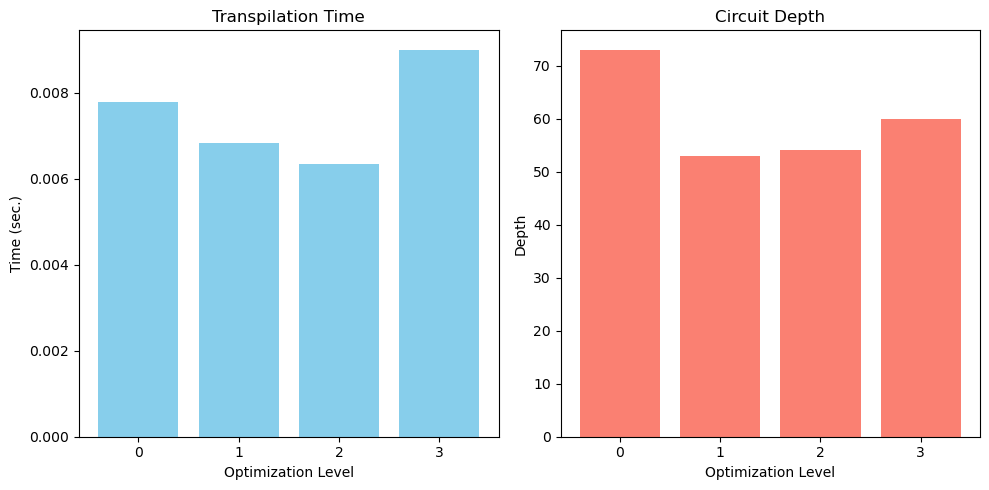

In [108]:
times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over different optimization levels
optimization_levels = [0,1,2,3]
for level in optimization_levels:
    pm = generate_preset_pass_manager(backend = backend, optimization_level=level, layout_method= "dense")
    ### YOUR CODE FINISHES HERE ###
    print('\033[1m' + f'Optimization level: {level}')
    start = time.time()
    isa_qc = pm.run(qc_s)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar([str(lvl) for lvl in optimization_levels], times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Optimization Level')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar([str(lvl) for lvl in optimization_levels], depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Optimization Level')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()